# Import Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import joblib

%matplotlib inline

# Read CSV

In [2]:
df = pd.read_csv('smoke_detection_iot.csv')
df

,Index,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


# Selected Feature

In [13]:
selected_feature = ['Index', 'UTC', 'TVOC[ppb]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5',	'NC0.5',	'NC1.0',	'NC2.5',	'CNT', 'Fire Alarm']

df_selected_feature = df.drop(selected_feature, axis=1)
df_selected_feature

,Temperature[C],Humidity[%],eCO2[ppm]
0,20.000,57.36,400
1,20.015,56.67,400
2,20.029,55.96,400
3,20.044,55.28,400
4,20.059,54.69,400
...,...,...,...
62625,18.438,15.79,400
62626,18.653,15.87,400
62627,18.867,15.84,400
62628,19.083,16.04,400


# Target

In [14]:
target = ['Index', 'UTC', 'Temperature[C]',	'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5',	'NC0.5',	'NC1.0',	'NC2.5',	'CNT']

df_target = df.drop(target, axis=1)
df_target

,Fire Alarm
0,0
1,0
2,0
3,0
4,0
...,...
62625,0
62626,0
62627,0
62628,0


# Correlation Matrix

In [5]:
corr = df.corr()
corr

,Index,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
Index,1.000000,0.551987,0.425636,-0.498121,0.248813,0.160665,-0.232854,0.083094,-0.580829,0.151785,0.128487,0.162053,0.126418,0.100300,-0.053262,-0.361351
UTC,0.551987,1.000000,-0.164174,-0.391907,0.180731,0.132100,-0.151088,0.166555,-0.434375,0.123168,0.105304,0.130288,0.103695,0.083234,-0.251595,-0.389404
Temperature[C],0.425636,-0.164174,1.000000,-0.243986,0.082442,0.079265,-0.135540,-0.037343,-0.251203,0.037330,0.032084,0.039291,0.031608,0.025526,-0.089850,-0.163902
Humidity[%],-0.498121,-0.391907,-0.243986,1.000000,-0.488878,-0.369095,0.247199,0.068782,0.694614,-0.236538,-0.178882,-0.277389,-0.174224,-0.118502,0.251965,0.399846
TVOC[ppb],0.248813,0.180731,0.082442,-0.488878,1.000000,0.606118,-0.653053,-0.673715,-0.220004,0.597366,0.477424,0.670657,0.467386,0.344721,-0.057703,-0.214743
eCO2[ppm],0.160665,0.132100,0.079265,-0.369095,0.606118,1.000000,-0.682785,-0.506695,-0.326043,0.665482,0.572691,0.699604,0.564252,0.456323,-0.106681,-0.097006
Raw H2,-0.232854,-0.151088,-0.135540,0.247199,-0.653053,-0.682785,1.000000,0.631495,0.303090,-0.530714,-0.431079,-0.587769,-0.422626,-0.318518,-0.031036,0.107007
Raw Ethanol,0.083094,0.166555,-0.037343,0.068782,-0.673715,-0.506695,0.631495,1.000000,-0.075926,-0.480698,-0.393192,-0.529186,-0.385720,-0.293351,-0.511995,-0.340652
Pressure[hPa],-0.580829,-0.434375,-0.251203,0.694614,-0.220004,-0.326043,0.303090,-0.075926,1.000000,-0.258938,-0.243071,-0.248657,-0.241148,-0.213390,0.186290,0.249797
PM1.0,0.151785,0.123168,0.037330,-0.236538,0.597366,0.665482,-0.530714,-0.480698,-0.258938,1.000000,0.956118,0.940045,0.949860,0.854901,-0.093700,-0.110552


# Correlation Matrix w/ Heatmap

<Axes: >

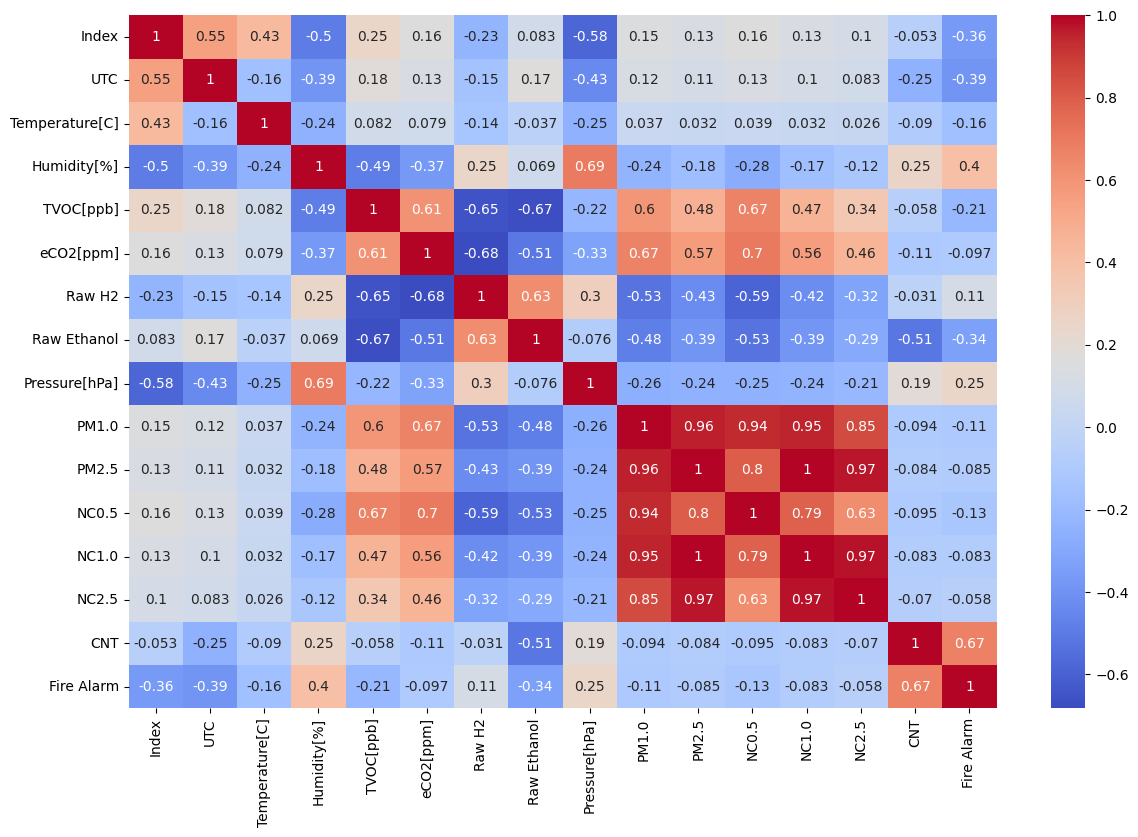

In [6]:
corr = df.corr()
plt.figure(figsize=(14,9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

#Selected Feature Correlation Matrix w/ Heatmap

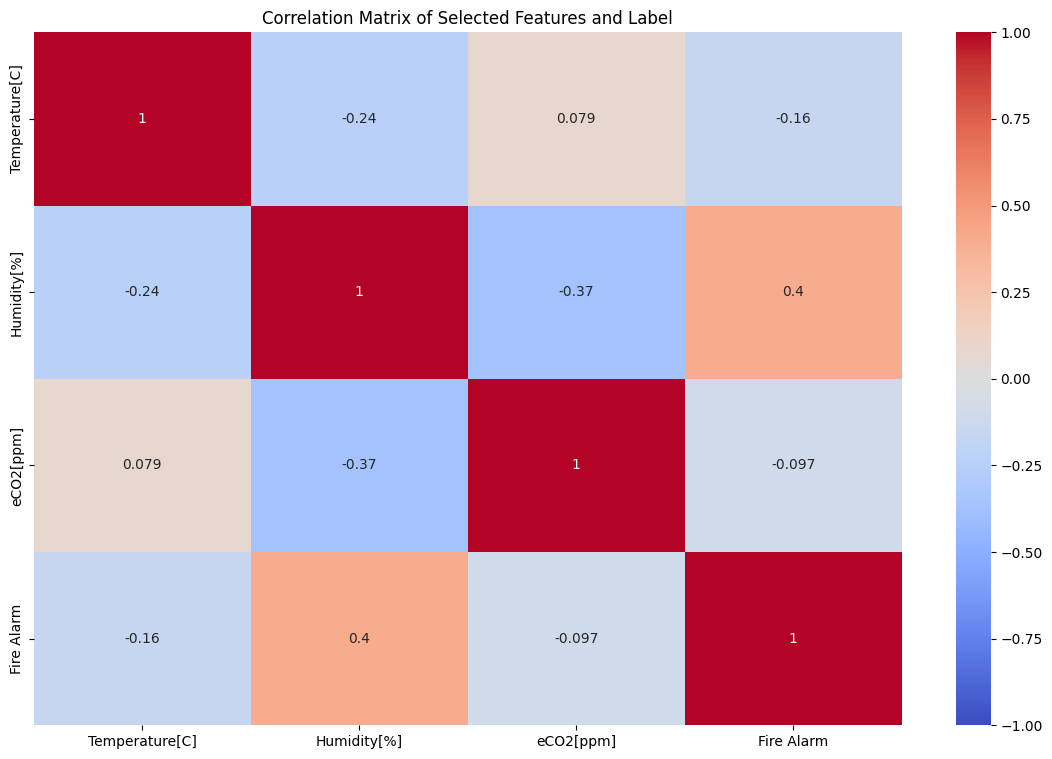

In [11]:
selected_feature = ['Temperature[C]', 'Humidity[%]', 'eCO2[ppm]']
target = 'Fire Alarm'

subset_df = df[selected_feature + [target]]

corr = subset_df.corr()

plt.figure(figsize=(14, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Selected Features and Label')
plt.show()

# Accuracy Using Random Forest Classifier

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Membaca file CSV
df = pd.read_csv('smoke_detection_iot.csv')

# Memilih fitur dan label target
X = df[['Temperature[C]', 'Humidity[%]', 'eCO2[ppm]']]
y = df['Fire Alarm']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model
model.fit(X_train, y_train)

# Memprediksi data uji
y_pred = model.predict(X_test)

# Mengevaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9633562190643462

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      3594
           1       0.97      0.98      0.97      8932

    accuracy                           0.96     12526
   macro avg       0.96      0.95      0.95     12526
weighted avg       0.96      0.96      0.96     12526



# Save Random Forest Classifier Model

In [17]:
# Save the model to a file
joblib.dump(model, 'ignis.pkl')

['ignis.pkl']

# Accuracy Using Convolutional Neural Network


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Membaca dataset
df = pd.read_csv('smoke_detection_iot.csv')

# Memilih fitur dan label target
X = df[['Temperature[C]', 'Humidity[%]', 'eCO2[ppm]']]
y = df['Fire Alarm']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Membangun model Neural Network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Mengompilasi model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Melatih model dengan Early Stopping
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping], batch_size=32)

# Evaluasi model pada data uji
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


Epoch 1/100
1253/1253 [==============================] - 5s 3ms/step - loss: 0.4047 - accuracy: 0.8389 - val_loss: 0.3288 - val_accuracy: 0.8606
Epoch 2/100
1253/1253 [==============================] - 3s 2ms/step - loss: 0.3023 - accuracy: 0.8704 - val_loss: 0.2772 - val_accuracy: 0.8743
Epoch 3/100
1253/1253 [==============================] - 3s 2ms/step - loss: 0.2717 - accuracy: 0.8836 - val_loss: 0.2579 - val_accuracy: 0.8867
Epoch 4/100
1253/1253 [==============================] - 4s 3ms/step - loss: 0.2586 - accuracy: 0.8905 - val_loss: 0.2528 - val_accuracy: 0.8906
Epoch 5/100
1253/1253 [==============================] - 3s 2ms/step - loss: 0.2513 - accuracy: 0.8951 - val_loss: 0.2450 - val_accuracy: 0.8966
Epoch 6/100
1253/1253 [==============================] - 3s 3ms/step - loss: 0.2474 - accuracy: 0.8980 - val_loss: 0.2404 - val_accuracy: 0.8995
Epoch 7/100
1253/1253 [==============================] - 3s 2ms/step - loss: 0.2443 - accuracy: 0.8991 - val_loss: 0.2417 - val_ac

# Accuracy Using Convolutional Neural Network + Hyperparameter Tuning

In [ ]:
!pip install keras-tuner --upgrade
from keras_tuner import RandomSearch

# Reading the dataset
df = pd.read_csv('smoke_detection_iot.csv')

# Selecting features and target label
X = df[['Temperature[C]', 'Humidity[%]', 'eCO2[ppm]']]
y = df['Fire Alarm']

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a model-building function for Keras Tuner
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=128, step=32), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(units=hp.Int('units_2', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(Dense(units=hp.Int('units_3', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Using Keras Tuner for hyperparameter tuning
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='smoke_detection'
)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Searching for the best hyperparameters
tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping], batch_size=32)

# Getting the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluating the best model on the test set
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')
